In [62]:
# Dependencies

import pandas as pd
import numpy as np
import pylab as plt
from sklearn.decomposition import PCA
from pprint import pprint
from datetime import datetime

from scipy.stats import linregress

In [2]:
data = pd.read_csv("./Resources/Indicators.csv")


In [39]:
data['IndicatorName'].unique().tolist()

['Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'Age dependency ratio (% of working-age population)',
 'Age dependency ratio, old (% of working-age population)',
 'Age dependency ratio, young (% of working-age population)',
 'Arms exports (SIPRI trend indicator values)',
 'Arms imports (SIPRI trend indicator values)',
 'Birth rate, crude (per 1,000 people)',
 'CO2 emissions (kt)',
 'CO2 emissions (metric tons per capita)',
 'CO2 emissions from gaseous fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (kt)',
 'CO2 emissions from solid fuel consumption (% of total)',
 'Death rate, crude (per 1,000 people)',
 'Fertility rate, total (births per woman)',
 'Fixed telephone subscriptions',
 'Fixed telephone subscriptions (per 100 people)',
 'Hospital beds (per 1,000 people)',
 'International migrant stock (% of population)',
 'International migrant stock, total',
 'Life expectancy at birt

In [4]:
short_data = data[['CountryCode', 'IndicatorName', 'Year', 'Value']]

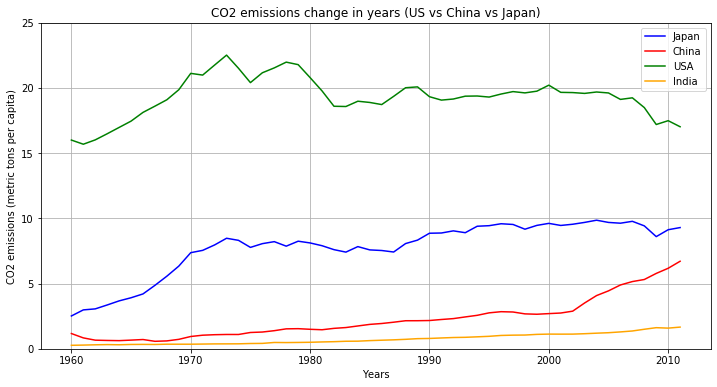

In [5]:
co2 = short_data['IndicatorName'].str.contains('CO2 emissions \(metric tons per capita')
#forest = data['IndicatorName'].str.contains('Forest area \(%')

country = (short_data['CountryCode'] == "USA")
co2_us  = short_data[co2 & country]
co2_us = co2_us.reset_index(drop = True)


country_china = (short_data['CountryCode'] == "CHN")
co2_china  = short_data[co2 & country_china]
co2_china = co2_china.reset_index(drop = True)



country_india= (short_data['CountryCode'] == "IND")
co2_india  = short_data[co2 & country_india]
co2_india = co2_india.reset_index(drop = True)

#forest = data['IndicatorName'].str.contains('Forest area \(%')

country_japan = (short_data['CountryCode'] == "JPN")
co2_japan= short_data[co2 & country_japan]
co2_japan= co2_japan.reset_index(drop = True)



#plt.ylim(0, 30)
plt.figure(figsize=(12,6))
plt.xlabel('Years')
plt.ylim(0,25)

plt.ylabel('CO2 emissions (metric tons per capita)')
plt.title('CO2 emissions change in years (US vs China vs Japan)')

plt.plot(co2_japan['Year'], co2_japan['Value'].values, label="Japan", color='BLUE')
plt.plot(co2_china['Year'], co2_china['Value'].values, label="China", color='Red')
plt.plot(co2_us['Year'],    co2_us['Value'].values,    label="USA",   color='Green')

plt.plot(co2_us['Year'],    co2_india['Value'].values,    label="India",   color='Orange')

plt.grid()
plt.legend()
plt.show()

In [6]:
#us_co2_total

pop = short_data['IndicatorName'].str.contains('Population, total')


country = (short_data['CountryCode'] == "USA")
pop_us  = short_data[pop & country]
pop_us = pop_us.reset_index(drop = True)
population_us=pop_us['Value']

#remove 2014,2013,2012
population_us.pop(54)
population_us.pop(53)
population_us.pop(52)

co2_us_value=co2_us['Value']
co2_total_us=population_us*co2_us_value

In [7]:
#china_co2_total
pop = short_data['IndicatorName'].str.contains('Population, total')


country = (short_data['CountryCode'] == "CHN")
pop_china= short_data[pop & country]
pop_china= pop_china.reset_index(drop = True)
population_china=pop_china['Value']

#remove 2014,2013,2012
population_china.pop(54)
population_china.pop(53)
population_china.pop(52)

co2_china_value=co2_china['Value']
co2_total_china=population_china*co2_china_value

In [8]:
#japan_co2_total
pop = short_data['IndicatorName'].str.contains('Population, total')


country = (short_data['CountryCode'] == "JPN")
pop_japan= short_data[pop & country]
pop_japan= pop_japan.reset_index(drop = True)
population_japan=pop_japan['Value']

#remove 2014,2013,2012
population_japan.pop(54)
population_japan.pop(53)
population_japan.pop(52)

co2_japan_value=co2_japan['Value']
co2_total_japan=population_japan*co2_japan_value

In [9]:
#India_co2_total
pop = short_data['IndicatorName'].str.contains('Population, total')


country = (short_data['CountryCode'] == "IND")
pop_india= short_data[pop & country]
pop_india= pop_india.reset_index(drop = True)
population_india=pop_india['Value']

#remove 2014,2013,2012
population_india.pop(54)
population_india.pop(53)
population_india.pop(52)

co2_india_value=co2_india['Value']
co2_total_india=population_india*co2_india_value

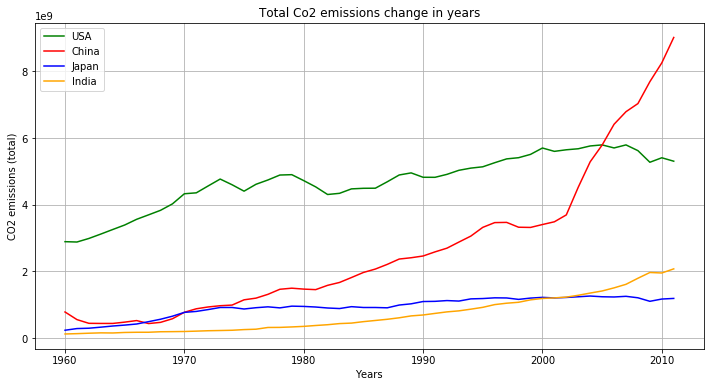

In [10]:
plt.figure(figsize=(12,6))
plt.xlabel('Years')
plt.ylabel('CO2 emissions (total)')
plt.title('Total Co2 emissions change in years')

plt.plot(co2_us['Year'],     co2_total_us,       label="USA",     color='Green')
plt.plot(co2_china['Year'],  co2_total_china,    label="China",   color='Red')
plt.plot(co2_japan['Year'],  co2_total_japan,    label="Japan",   color='Blue')
plt.plot(co2_india['Year'],  co2_total_india,    label="India",   color='Orange')

plt.grid()
plt.legend()
plt.show()

In [ ]:
#GDP per captia growth : US about 2% vs China 7-8%

In [206]:
gdp_growth= short_data['IndicatorName'].str.contains('GDP per capita growth')

country = (short_data['CountryCode'] == "CHN")
gdp_growth_china= short_data[gdp_growth & country]
gdp_growth_china=gdp_growth_china[(gdp_growth_china['Year']>1970) & (gdp_growth_china['Year']<=2011)]
gdp_growth_china= gdp_growth_china.reset_index(drop = True)

gdp_growth_china['Value'].mean()

7.868192875964958

In [197]:
gdp_growth_china=gdp_growth_china['Value']

In [209]:
gdp_growth_china

,CountryCode,IndicatorName,Year,Value
0,CHN,GDP per capita growth (annual %),1971,4.100802
1,CHN,GDP per capita growth (annual %),1972,1.280349
2,CHN,GDP per capita growth (annual %),1973,5.464132
3,CHN,GDP per capita growth (annual %),1974,0.208210
4,CHN,GDP per capita growth (annual %),1975,6.796791
5,CHN,GDP per capita growth (annual %),1976,-3.110861
6,CHN,GDP per capita growth (annual %),1977,6.143596
7,CHN,GDP per capita growth (annual %),1978,10.394695
8,CHN,GDP per capita growth (annual %),1979,6.174224
9,CHN,GDP per capita growth (annual %),1980,6.463001


In [198]:
co2_china_1970=co2_china[(co2_china['Year']>1970)]
co2_china_1970= co2_china_1970.reset_index(drop = True)
co2_china_1970=co2_china_1970['Value']


In [199]:
#linear regression
x_values=gdp_growth_china
y_values=co2_china_1970

y = 0.18x + 1.22
The r-squared is: 0.4497794463349844


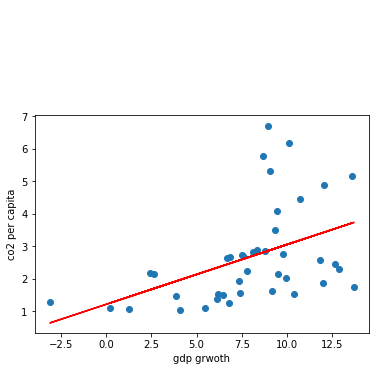

In [200]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('gdp grwoth')
plt.ylabel('co2 per capita')
print(line_eq)
print(f"The r-squared is: {rvalue}")
plt.show()

In [207]:
gdp_growth= short_data['IndicatorName'].str.contains('GDP per capita growth')


country = (short_data['CountryCode'] == "USA")
gdp_growth_us= short_data[gdp_growth & country]
gdp_growth_us=gdp_growth_us[(gdp_growth_us['Year']>1970) & (gdp_growth_us['Year']<=2011)]
gdp_growth_us= gdp_growth_us.reset_index(drop = True)

#gdp_growth_china=gdp_growth_china['Value']
gdp_growth_us['Value'].mean()

1.8387030287807506

In [202]:
gdp_growth_us=gdp_growth_us['Value']


In [203]:
co2_us_1970=co2_us[(co2_us['Year']>1970)]
co2_us_1970= co2_us_1970.reset_index(drop = True)
co2_us_1970=co2_us_1970['Value']


In [204]:
#linear regression
x_values=gdp_growth_us
y_values=co2_us_1970

y = 0.21x + 19.34
The r-squared is: 0.35574887405733924


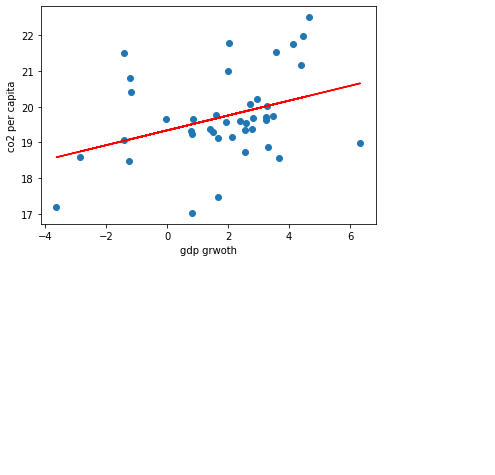

In [205]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('gdp grwoth')
plt.ylabel('co2 per capita')
print(line_eq)
print(f"The r-squared is: {rvalue}")
plt.show()

In [235]:
#china_co2_total
pop = short_data['IndicatorName'].str.contains('Population, total')


country = (short_data['CountryCode'] == "CHN")
pop_china= short_data[pop & country]
pop_china=pop_china[(pop_china['Year']>1970)&(pop_china['Year']<=2011)]
pop_china= pop_china.reset_index(drop = True)
population_china=pop_china['Value']

co2_china=co2_china[(co2_china['Year']>1970)&(co2_china['Year']<=2011)]
co2_china= co2_china.reset_index(drop = True)
co2_china_value=co2_china['Value']
co2_total_china=population_china*co2_china_value

In [237]:
gdp_growth= short_data['IndicatorName'].str.contains('GDP per capita growth')

country = (short_data['CountryCode'] == "CHN")
gdp_growth_china= short_data[gdp_growth & country]
gdp_growth_china=gdp_growth_china[(gdp_growth_china['Year']>1970) & (gdp_growth_china['Year']<=2011)]
gdp_growth_china= gdp_growth_china.reset_index(drop = True)
gdp_growth_china=gdp_growth_china['Value']

In [239]:
x_values=gdp_growth_china
y_values=co2_total_china

y = 263344096.48x + 1131672832.56
The r-squared is: 0.443345036822857


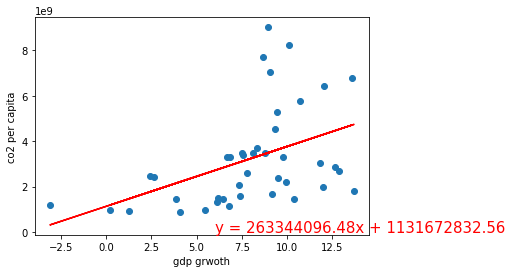

In [240]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('gdp grwoth')
plt.ylabel('co2 per capita')
print(line_eq)
print(f"The r-squared is: {rvalue}")
plt.show()

In [245]:
#china_co2_total
pop = short_data['IndicatorName'].str.contains('Population, total')


country = (short_data['CountryCode'] == "USA")
pop_us= short_data[pop & country]
pop_us=pop_us[(pop_us['Year']>1970)&(pop_us['Year']<=2011)]
pop_us= pop_us.reset_index(drop = True)
population_us=pop_us['Value']

co2_us=co2_us[(co2_us['Year']>1970)&(co2_us['Year']<=2011)]
co2_us= co2_us.reset_index(drop = True)
co2_us_value=co2_us['Value']
co2_total_us=population_us*co2_us_value

In [246]:
gdp_growth= short_data['IndicatorName'].str.contains('GDP per capita growth')

country = (short_data['CountryCode'] == "CHN")
gdp_growth_us= short_data[gdp_growth & country]
gdp_growth_us=gdp_growth_us[(gdp_growth_us['Year']>1970) & (gdp_growth_us['Year']<=2011)]
gdp_growth_us= gdp_growth_us.reset_index(drop = True)
gdp_growth_us=gdp_growth_us['Value']

In [251]:
x_values=gdp_growth_us
y_values=co2_total_us

y = 46954318.92x + 4665554113.07
The r-squared is: 0.36168297831713164


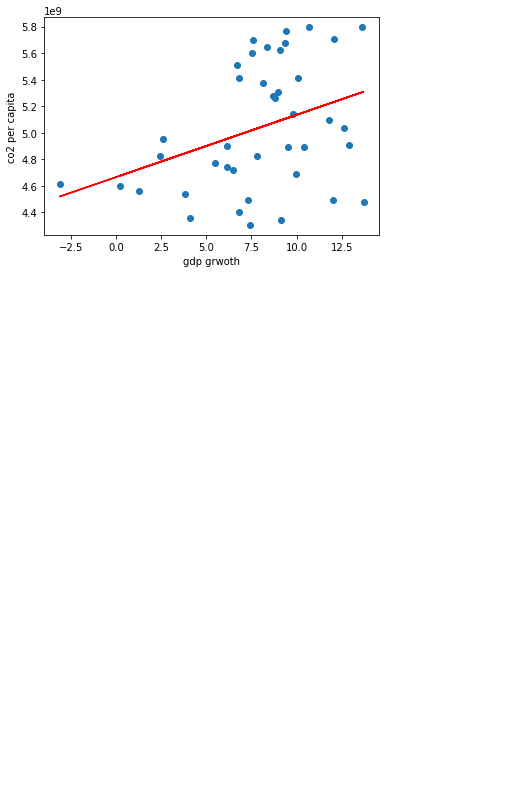

In [252]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('gdp grwoth')
plt.ylabel('co2 per capita')
print(line_eq)
print(f"The r-squared is: {rvalue}")
plt.show()